# Analyse results - DistilBART training

In [18]:
import os, math, re
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
CWD = os.getcwd()
RESULTS_DIR = os.path.join(CWD, 'results', 'bart_results_1409')

In [20]:
exp_epochs = dict()
for root, _, files in os.walk(RESULTS_DIR):
    count = 0
    for file in files:
        if 'log' in file and 'csv' in file:
            exp_epochs[file] = pd.read_csv(os.path.join(root, file))

In [ ]:
def get_params_from_name(file):
    file_pattern = r"lr-(\d+[\.e\-\d+]?)-bs-(\d+)-maxep-(\d+)"
    match = re.search(file_pattern, file)
    lr = float(match.group(1))
    batch_size = int(match.group(2))
    max_epoch = int(match.group(3))
    print(f"lr: {lr}, batch_size: {batch_size}, max_epoch: {max_epoch}")
    return lr, batch_size, max_epoch

In [26]:
def plot_loss(df_dict: dict[str, pd.DataFrame]):
    # training vs evaluation loss for each experiment
    #get keys
    lrs = set()
    batch_sizes = set()
    max_epochs = set()

    file_names = df_dict.keys()
    for name in file_names:
        lr, bs, maxep = get_params_from_name(name)
        lrs.add(lr)
        batch_sizes.add(bs)
        max_epochs.add(maxep)
    
    lrs = sorted(list(lrs))
    batch_sizes = sorted(list(batch_sizes))
    max_epochs = sorted(list(max_epochs))

    figure, axes = plt.subplots(len(lrs),len(batch_sizes))

    for name, df in df_dict.items():
        lr, bs, maxep = get_params_from_name(name)
        ax = axes[lrs.index(lr), max_epochs.index(maxep)]
        ax.plot(df["epoch"], df["loss"], label=f"Train loss, bs {bs}")
        ax.plot(df["epoch"], df["eval_loss"], label=f"Validation loss, bs {bs}")
        ax.legend()
        ax.set_ylim(0, 8)
        ax.set_title(f"Train vs validation loss, learning rate {lr}")
    # figure.tight_layout(pad=1)
    plt.show()
plot_loss(exp_epochs)

AttributeError: 'NoneType' object has no attribute 'group'

In [13]:
len(exp_epochs)

18

C:\Users\gracz\AppData\Local\Temp\ipykernel_10112\2600419833.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


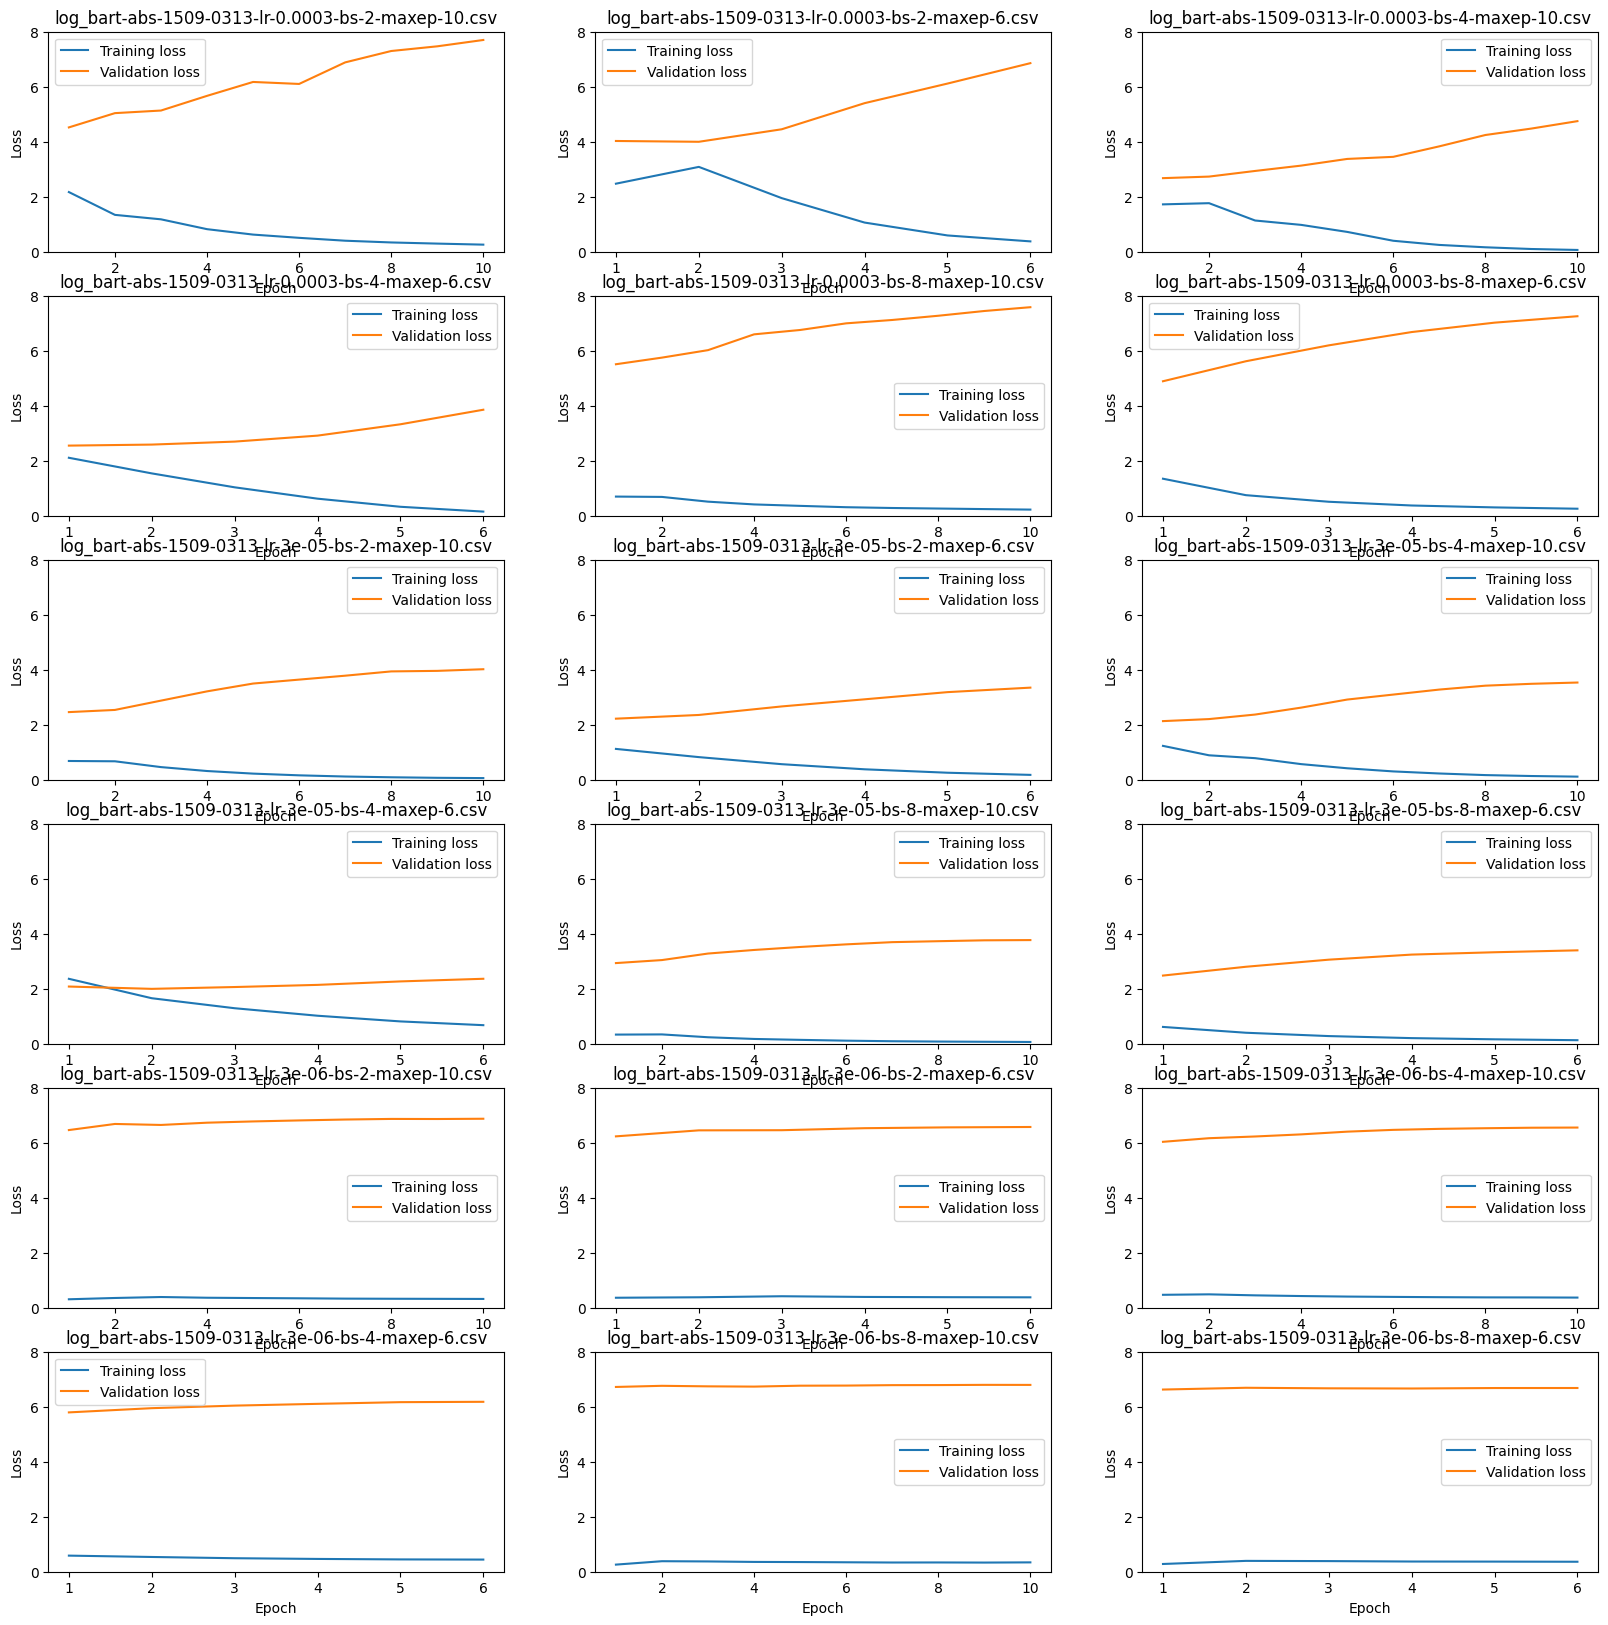